In [1]:
from mdcrow import MDCrow

In [2]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-09-09
time: 10:43:18


In [3]:
model='gpt-4-turbo-2024-04-09'
mda = MDCrow(
    agent_type='Structured', 
    model=model, 
    tools_model=model,
    use_memory=False, 
    top_k_tools="all"
)
print("LLM: ", mda.llm.model_name,"\nTemperature: ", mda.llm.temperature)

LLM:  gpt-4-turbo-2024-04-09 
Temperature:  0.1


In [4]:
prompt = 'Compare the RMSF of 1UBQ under high pressure and low pressure. Perform the simulation for 1 ns, varying only the pressure. Plot the moments of inertia over time for both simulations.'
answer = mda.run(prompt)

Thought: To address the question, I need to perform two molecular dynamics simulations of the protein 1UBQ, one under high pressure and one under low pressure, each for 1 ns. After the simulations, I will compute the Root Mean Square Fluctuation (RMSF) for both conditions and plot the moments of inertia over time. First, I need to set up and run the simulations for both pressure conditions.

Action:
```json
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1UBQ",
        "forcefield_files": ["amber99sb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "constraintTolerance": 0.00001,
            "solvate": true
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle",
            "Temperature": "300 * kelvin",
            "Friction": "1.0 / picoseconds",

System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x122c34f60> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...
Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...
Simulating...
Done!
Standalone simulation script written to /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_327/simulations/NPT_1UBQ_104400_20240909_104414.py
['exp_11.ipynb', 'TRAJ_sim0_104637_1TRN_104626_20240909_104657.dcd', 'LOG_sim0_103311_1ZNI_103300_20240909_103315.txt', 'exp_13.ipynb', 'exp_22_gpt-4-turbo-2024-04-09.out', 'TOP_sim0_102718_1XQ8_102708_20240909_102752.pdb', 'TRAJ_sim0_110355_1ZNI_103634_20240909_110407.dcd', 'exp_9.ipynb', 'exp_17.ipynb', 'exp_3_gpt-4-turbo-2024-04-09.out', 'TOP_sim0_104414_1UBQ_104400_20240909_104424.pdb', 'exp_15.ipynb', 'exp_24_gpt-4-turbo-2024-04-09.out', 'exp_2_gpt-4-turbo-2024-04-09.out', 'exp_12.ipynb', 'LOG_sim0_110355_1ZNI_103634_20240909_110

In [5]:
end = datetime.datetime.now()
elapsed = end - start
print(f"duration: {elapsed.total_seconds()/60:.2f} minutes")

duration: 447.78 minutes


# Confirms files are made or downloaded

In [6]:
registry = mda.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1UBQ_104337, 1UBQ_104400, top_sim0_104414, sim0_104414, rec0_104424, rec1_104424, rec2_104424, top_sim0_140721, sim0_140721, rec0_140727, rec1_140727, rec2_140727, rmsf_104414, fig0_181035, rmsf_140721, fig0_181040, MOI_sim0_104414, fig0_181047, MOI_sim0_140721, fig0_181053


In [8]:
# # ensure all files exist
# file_ids = ["1UBQ,"]
# assert all(f in all_names for f in file_ids), "Not all file ids are present in path registry"

# for f in file_ids:
#     match = re.search(rf"{f}_\d+", all_names)
#     if match is None: 
#         print(f"this file id {f} is not in path registry")
#     file_id = match.group(0)
#     path = registry.get_mapped_path(file_id)
#     if not os.path.exists(path):
#         print(f"the file for {file_id} doesn't exist")

In [ ]:
# print parameters for both simulations (from files or agent output)

In [9]:
print(("\n").join(registry.list_path_names_and_descriptions().split(',')))

Files found in registry: 1UBQ_104337: PDB file downloaded from RSCB
 PDBFile ID: 1UBQ_104337
 1UBQ_104400: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_104414: Initial positions for simulation sim0_104414
 sim0_104414: Basic Simulation of Protein 1UBQ_104400
 rec0_104424: Simulation trajectory for protein 1UBQ_104400 and simulation sim0_104414
 rec1_104424: Simulation state log for protein 1UBQ_104400 and simulation sim0_104414
 rec2_104424: Simulation pdb frames for protein 1UBQ_104400 and simulation sim0_104414
 top_sim0_140721: Initial positions for simulation sim0_140721
 sim0_140721: Basic Simulation of Protein 1UBQ_104400
 rec0_140727: Simulation trajectory for protein 1UBQ_104400 and simulation sim0_140721
 rec1_140727: Simulation state log for protein 1UBQ_104400 and simulation sim0_140721
 rec2_140727: Simulation pdb frames for protein 1UBQ_1044

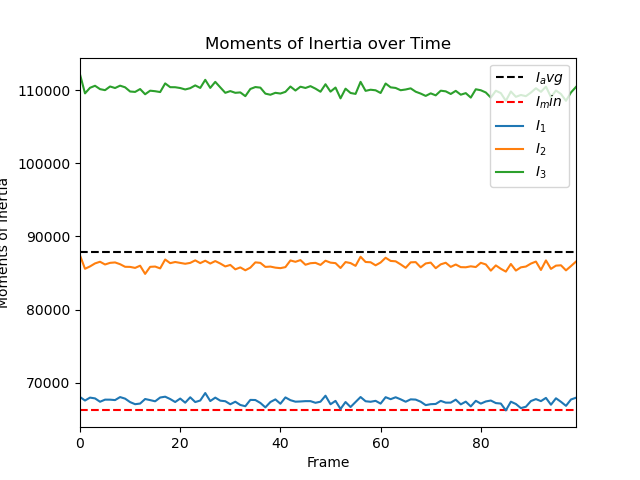

In [10]:
from IPython.display import Image

Image(filename=registry.get_mapped_path("fig0_181047"))

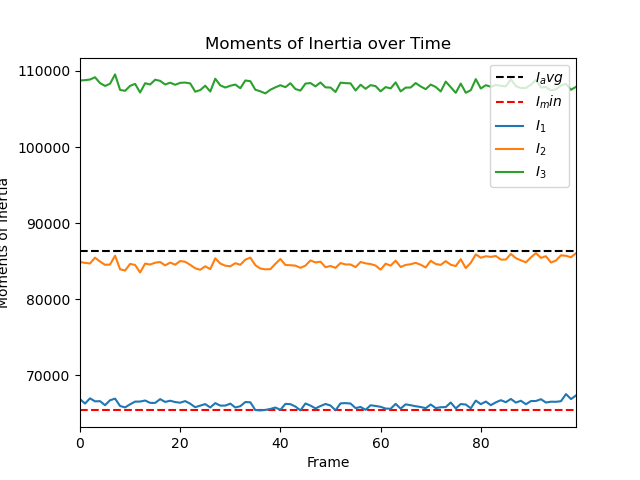

In [11]:
Image(filename=registry.get_mapped_path("fig0_181053"))

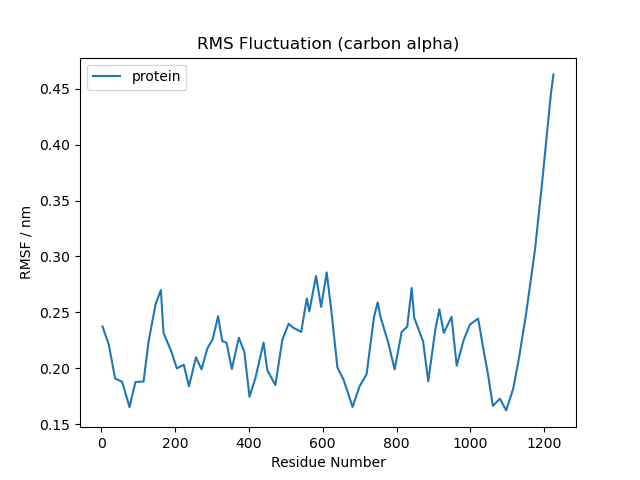

In [12]:
Image(filename=registry.get_mapped_path("fig0_181035"))

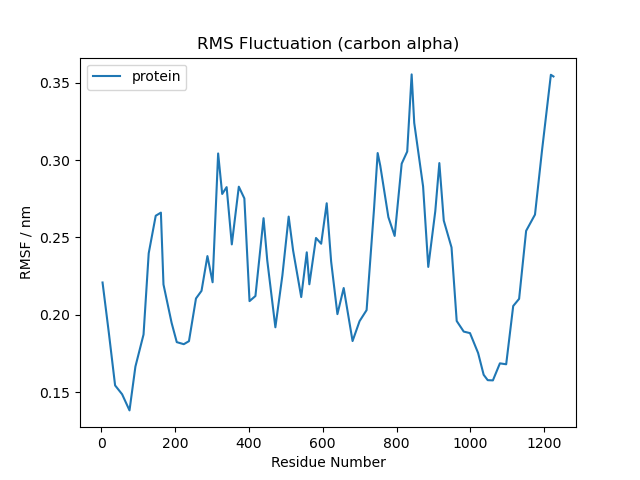

In [13]:
# print rmsf inputs from output, match them with two trajs
Image(filename=registry.get_mapped_path("fig0_181040"))

# Experiment Result:

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3. No hallucination ✅
4. Logic make sense ✅
5. Correct Answer ✅
6. Number of steps completed: 7
7. % steps completed: 100%